In [59]:
from tqdm import tqdm
import numpy as np

from utils.User_Classes import UserClass
from utils.tools import calculate_margin, calculate_price_index
from utils.Clairvoyant import find_optimal_bid_for_class
from utils.learners.GPTS_Learner import GPTS_Learner
from utils.learners.GPUCB_Learner import GPUCB_Learner
from p2.bidding_enviroment import BiddingEnvironment

import warnings
warnings.filterwarnings("ignore")

# Environment

In [60]:
#Environment
n_arms = 100
min_bid = 0.01
max_bid = 3.0
bids = np.linspace(min_bid, max_bid, n_arms)
sigma = 200

user = UserClass(name='C1')

#names = ['Young ', 'Old', 'Not Sporty', 'Sporty']

price = 200
T = 20
n_experiments = 5

gpts_rewards_per_experiment = []
gpucb_rewards_per_experiment = []


optimum_bid = find_optimal_bid_for_class(user.user_index, calculate_price_index(price))

# Experiment

In [61]:
for e in tqdm(range(0, 5)):
    env = BiddingEnvironment(bids=bids, sigma = sigma, user_class=user, price=price, n_arms=n_arms)
    gpts_learner = GPTS_Learner(n_arms, arms=bids)
    gpucb_learner = GPUCB_Learner(n_arms, arms=bids)

    for t in range(T):
        #GP Thompson Sampling
        pulled_arm = gpts_learner.pull_arm()
        reward = env.round(pulled_arm)
        gpts_learner.update(pulled_arm, reward)

        #GP Upper Confidence Bounds
        pulled_arm = gpucb_learner.pull_arm()
        reward = env.round(pulled_arm)
        gpucb_learner.update(pulled_arm, reward)

    gpts_rewards_per_experiment.append(gpts_learner.collected_rewards)
    gpucb_rewards_per_experiment.append(gpucb_learner.collected_rewards)

  0%|          | 0/5 [00:00<?, ?it/s]


NameError: name 'np' is not defined

# Cumulative Regret
The cumulative regret at a given round (in our case day) t is the sum of the regrets experienced up until and including that day.

## GPTS

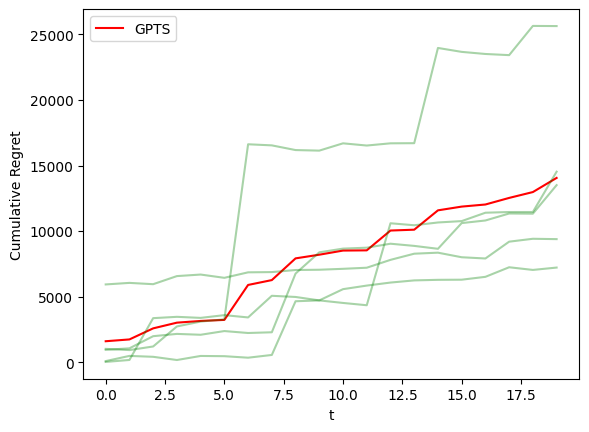

In [ ]:
plt.figure(0)
plt.ylabel("Cumulative Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(optimum_bid[1] - gpts_rewards_per_experiment, axis=0)), 'r', label='GPTS')
for index, line in enumerate(gpts_rewards_per_experiment):
        plt.plot(np.nancumsum(optimum_bid[1] - line, axis=0), "g", alpha=1 / np.power(len(gpts_rewards_per_experiment), 2/3))
plt.legend()
plt.show()

## GPUCB

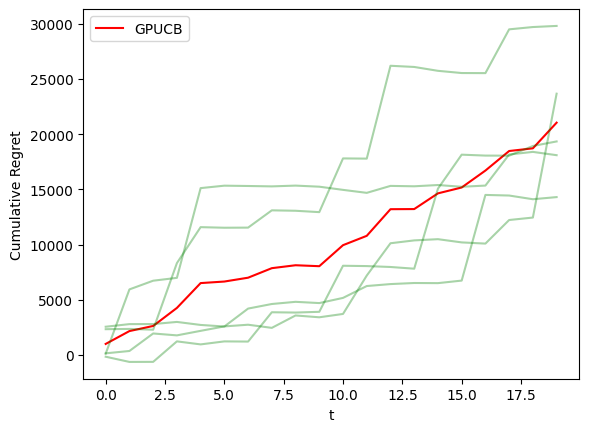

In [ ]:
plt.figure(0)
plt.ylabel("Cumulative Regret")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(optimum_bid[1] - gpucb_rewards_per_experiment, axis=0)), 'r', label='GPUCB')
for index, line in enumerate(gpucb_rewards_per_experiment):
        plt.plot(np.nancumsum(optimum_bid[1] - line, axis=0), "g", alpha=1 / np.power(len(gpts_rewards_per_experiment), 2/3))
plt.legend()
plt.show()

# Cumulative Reward

The cumulative reward at a given round (in our case day) t is the sum of the rewards received up until and including that day.

## GPTS

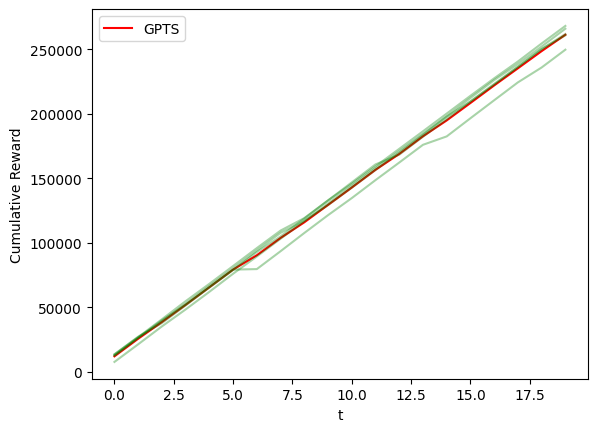

In [ ]:
plt.figure(0)
plt.ylabel("Cumulative Reward")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(gpts_rewards_per_experiment, axis=0)), 'r', label='GPTS')
for index, line in enumerate(gpts_rewards_per_experiment):
        plt.plot(np.nancumsum(line, axis=0), "g", alpha=1 / np.power(len(gpts_rewards_per_experiment), 2/3))
plt.legend()
plt.show()

## GPUCB

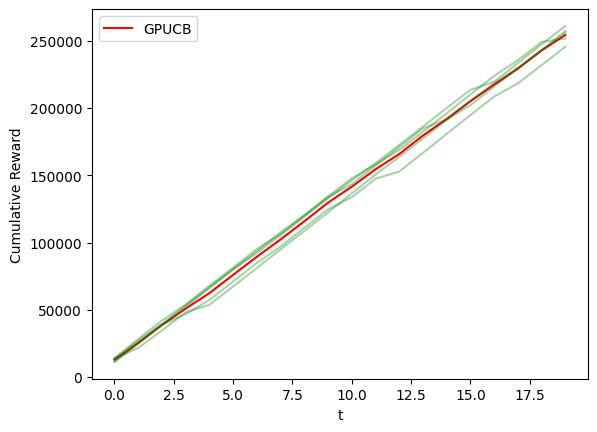

In [ ]:
plt.figure(0)
plt.ylabel("Cumulative Reward")
plt.xlabel("t")
plt.plot(np.cumsum(np.mean(gpucb_rewards_per_experiment, axis=0)), 'r', label='GPUCB')
for index, line in enumerate(gpucb_rewards_per_experiment):
        plt.plot(np.nancumsum(line, axis=0), "g", alpha=1 / np.power(len(gpucb_rewards_per_experiment), 2/3))

plt.legend()
plt.show()

# Istantaneous Regret
Instantaneous regret is a measure of how much better you could have done on a particular day t if you had made the optimal decisions (as determined by your clairvoyant optimization algorithm). It's defined as the difference between the optimal reward and the actual reward received on day t.



## GPTS

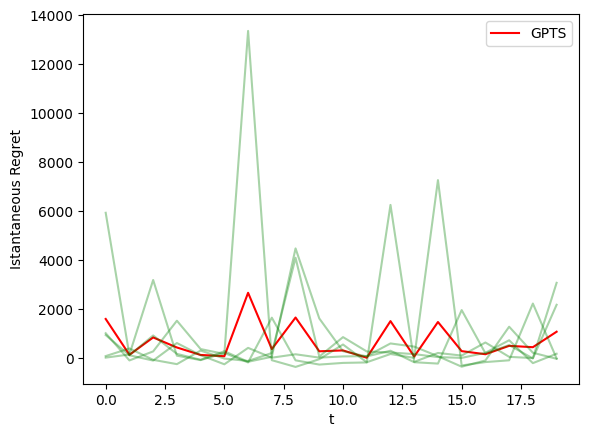

In [ ]:
plt.figure(0)
plt.ylabel("Istantaneous Regret")
plt.xlabel("t")
plt.plot(np.mean(optimum_bid[1] - gpts_rewards_per_experiment, axis=0), 'r', label='GPTS')
for index, line in enumerate(gpts_rewards_per_experiment):
        plt.plot(optimum_bid[1] - line, "g",  alpha=1 / np.power(len(gpts_rewards_per_experiment) , 2/3))
plt.legend()
plt.show()

## GPUCB

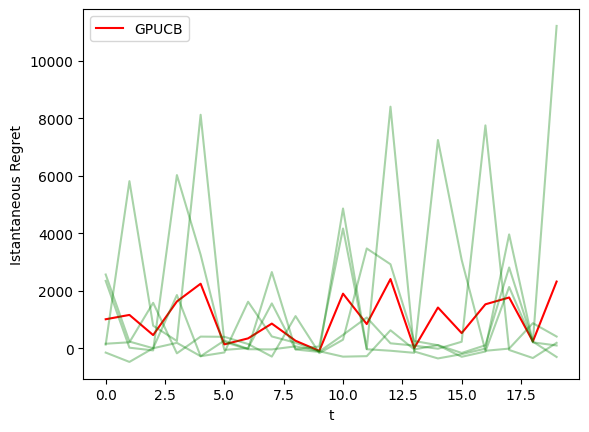

In [ ]:
plt.figure(0)
plt.ylabel("Istantaneous Regret")
plt.xlabel("t")
plt.plot(np.mean(optimum_bid[1] - gpucb_rewards_per_experiment, axis=0), 'r', label='GPUCB')
for index, line in enumerate(gpucb_rewards_per_experiment):
        plt.plot(optimum_bid[1] - line, "g",  alpha=1 / np.power(len(gpucb_rewards_per_experiment) , 2/3))
plt.legend()
plt.show()

# Istantaneous Reward
The instantaneous reward at a given round (or day) t would be the reward received on that particular day.

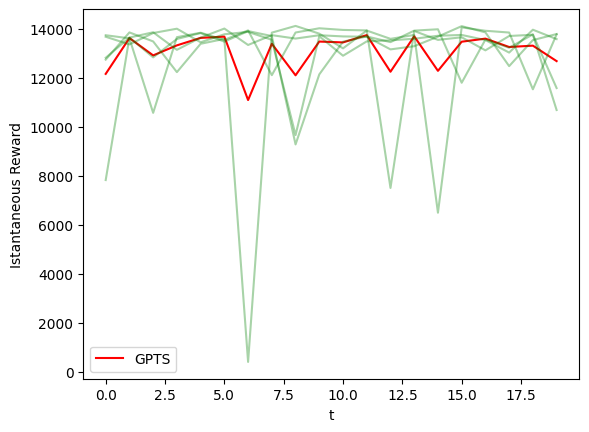

In [ ]:
plt.figure(0)
plt.ylabel("Istantaneous Reward")
plt.xlabel("t")
plt.plot(np.mean(gpts_rewards_per_experiment, axis=0), 'r', label='GPTS')
for line in gpts_rewards_per_experiment:
    plt.plot(line, "g", alpha=1 / np.power(len(gpts_rewards_per_experiment), 2/3))
plt.legend()
plt.show()

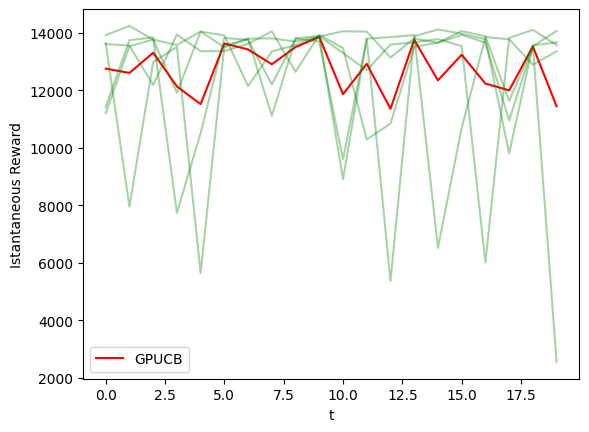

In [ ]:
plt.figure(0)
plt.ylabel("Istantaneous Reward")
plt.xlabel("t")
plt.plot(np.mean(gpucb_rewards_per_experiment, axis=0), 'r', label='GPUCB')
for line in gpucb_rewards_per_experiment:
    plt.plot(line, "g", alpha=1 / np.power(len(gpucb_rewards_per_experiment), 2/3))
plt.legend()
plt.show()